In [1]:
#Loading Python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import chi2_contingency, pearsonr

In [2]:
#Import the dataset
df = pd.read_csv('/content/Postpartum Depression Detection in Bangladesh.csv')

In [3]:
# Check data dimension
df.shape

(164, 24)

In [4]:
# Preview data
df.head(5)

,Timestamp,Age,Education,Residence,Occupation,Household income,Number of family members,Number of children,Child birth process,Weeks of your baby born,...,Poor appetite or overeating,Moving or speaking so slowly or the opposite being so fidgety or restless,Not being able to find humor in things,Blamed yourself unnecessarily when things went wrong,Being tensed or concerned without cause,Experienced fear or panic without a valid basis,So upset that have had trouble sleeping,Felt sad or miserable,Have been crying because of being miserable,Desire to hurt yourself
0,14/08/2024 22:56:16,31-35,Ph.D or higher,Urban,Full-time Employee,"50,000-80,000",4,1,Caesarean delivery,25 - 30 weeks,...,Sometimes,Not at all,Not at all,Sometimes,Sometimes,Sometimes,Not at all,Sometimes,Not at all,Not at all
1,14/08/2024 23:17:25,31-35,Master's Degree,Urban,Housewife,"25,000-50,000",4,2,Caesarean delivery,18 - 24 weeks,...,Sometimes,Not at all,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Not at all,Sometimes,Sometimes
2,14/08/2024 23:24:34,31-35,Master's Degree,Urban,Full-time Employee,"50,000-80,000",6 or more,1,Caesarean delivery,18 - 24 weeks,...,Most of the time,Sometimes,Not at all,Sometimes,Everytime,Most of the time,Sometimes,Sometimes,Sometimes,Sometimes
3,14/08/2024 23:26:32,31-35,Master's Degree,Urban,Full-time Employee,"50,000-80,000",5,1,Caesarean delivery,18 - 24 weeks,...,Most of the time,Sometimes,Not at all,Sometimes,Everytime,Everytime,Most of the time,Most of the time,Sometimes,Sometimes
4,15/08/2024 04:59:03,26-30,HSC,Urban,Housewife,"<25,000",5,2,Caesarean delivery,18 - 24 weeks,...,Most of the time,Most of the time,Not at all,Most of the time,Everytime,Sometimes,Most of the time,Sometimes,Sometimes,Sometimes


In [5]:
df.tail(5)

,Timestamp,Age,Education,Residence,Occupation,Household income,Number of family members,Number of children,Child birth process,Weeks of your baby born,...,Poor appetite or overeating,Moving or speaking so slowly or the opposite being so fidgety or restless,Not being able to find humor in things,Blamed yourself unnecessarily when things went wrong,Being tensed or concerned without cause,Experienced fear or panic without a valid basis,So upset that have had trouble sleeping,Felt sad or miserable,Have been crying because of being miserable,Desire to hurt yourself
159,3/11/2024 11:41,26-30,Master's Degree,Urban,Housewife,"25,000-50,000",4,2,Caesarean delivery,25 - 30 weeks,...,Not at all,Not at all,Not at all,Most of the time,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all
160,3/11/2024 11:42,26-30,Master's Degree,Urban,Housewife,"25,000-50,000",4,2,Caesarean delivery,25 - 30 weeks,...,Sometimes,Not at all,Not at all,Not at all,Sometimes,Not at all,Everytime,Not at all,Most of the time,Not at all
161,3/11/2024 11:44,18-25,HSC,Urban,Housewife,"25,000-50,000",3,1,Caesarean delivery,25 - 30 weeks,...,Most of the time,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all
162,3/11/2024 11:55,<18,SSC or less,Urban,Housewife,"<25,000",3,1,Normal delivery,25 - 30 weeks,...,Most of the time,Not at all,Everytime,Sometimes,Sometimes,Not at all,Not at all,Not at all,Not at all,Not at all
163,3/11/2024 11:56,26-30,SSC or less,Urban,Housewife,"25,000-50,000",6 or more,1,Caesarean delivery,25 - 30 weeks,...,Sometimes,Not at all,Sometimes,Sometimes,Most of the time,Not at all,Sometimes,Everytime,Everytime,Not at all


In [6]:
#Drop 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)
df.head()

,Age,Education,Residence,Occupation,Household income,Number of family members,Number of children,Child birth process,Weeks of your baby born,Lack of enthusiasm or enjoyment in doing things,...,Poor appetite or overeating,Moving or speaking so slowly or the opposite being so fidgety or restless,Not being able to find humor in things,Blamed yourself unnecessarily when things went wrong,Being tensed or concerned without cause,Experienced fear or panic without a valid basis,So upset that have had trouble sleeping,Felt sad or miserable,Have been crying because of being miserable,Desire to hurt yourself
0,31-35,Ph.D or higher,Urban,Full-time Employee,"50,000-80,000",4,1,Caesarean delivery,25 - 30 weeks,Sometimes,...,Sometimes,Not at all,Not at all,Sometimes,Sometimes,Sometimes,Not at all,Sometimes,Not at all,Not at all
1,31-35,Master's Degree,Urban,Housewife,"25,000-50,000",4,2,Caesarean delivery,18 - 24 weeks,Sometimes,...,Sometimes,Not at all,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Not at all,Sometimes,Sometimes
2,31-35,Master's Degree,Urban,Full-time Employee,"50,000-80,000",6 or more,1,Caesarean delivery,18 - 24 weeks,Most of the time,...,Most of the time,Sometimes,Not at all,Sometimes,Everytime,Most of the time,Sometimes,Sometimes,Sometimes,Sometimes
3,31-35,Master's Degree,Urban,Full-time Employee,"50,000-80,000",5,1,Caesarean delivery,18 - 24 weeks,Most of the time,...,Most of the time,Sometimes,Not at all,Sometimes,Everytime,Everytime,Most of the time,Most of the time,Sometimes,Sometimes
4,26-30,HSC,Urban,Housewife,"<25,000",5,2,Caesarean delivery,18 - 24 weeks,Sometimes,...,Most of the time,Most of the time,Not at all,Most of the time,Everytime,Sometimes,Most of the time,Sometimes,Sometimes,Sometimes


In [7]:
#Summarize data
print("Data Summary:")
print(df.info())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Age                                                                        164 non-null    object
 1   Education                                                                  164 non-null    object
 2   Residence                                                                  164 non-null    object
 3   Occupation                                                                 164 non-null    object
 4   Household income                                                           164 non-null    object
 5   Number of family members                                                   164 non-null    object
 6   Number of children                                  

In [8]:
#Generate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all').T)


Descriptive Statistics:
                                                   count unique  \
Age                                                  164      5   
Education                                            164      6   
Residence                                            164      2   
Occupation                                           164      4   
Household income                                     164      5   
Number of family members                             164      4   
Number of children                                   164      3   
Child birth process                                  164      2   
Weeks of your baby born                              164      4   
Lack of enthusiasm or enjoyment in doing things      164      4   
Feeling down, depressed, or hopeless                 164      4   
Having problems in sleeping                          164      4   
Experience fatigue or low energy                     164      4   
Poor appetite or overeating          

In [9]:
# Absolute counts of unique values for each feature
print("\nAbsolute Counts of Unique Values for Each Feature:")
for col in df.columns:
    print(df[col].value_counts())
    print("\n")


Absolute Counts of Unique Values for Each Feature:
Age
18-25    50
26-30    49
31-35    42
>35      15
<18       8
Name: count, dtype: int64


Education
Master's Degree      62
Bachelor's Degree    30
SSC or less          29
HSC                  26
Primary Education    16
Ph.D or higher        1
Name: count, dtype: int64


Residence
Urban    112
Rural     52
Name: count, dtype: int64


Occupation
Housewife             89
Full-time Employee    56
Student               17
Part-time Employee     2
Name: count, dtype: int64


Household income
25,000-50,000      72
<25,000            45
50,000-80,000      35
80,000-1,00,000     8
>1,00,000           4
Name: count, dtype: int64


Number of family members
6 or more    45
5            44
4            42
3            33
Name: count, dtype: int64


Number of children
1            71
2            68
3 or more    25
Name: count, dtype: int64


Child birth process
Caesarean delivery    120
Normal delivery        44
Name: count, dtype: int64


Week

In [10]:
# Relative counts of unique values for each feature in percentage
print("\nRelative Counts (in percentage) of Unique Values for Each Feature:")
for col in df.columns:
    print((df[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%')
    print("\n")


Relative Counts (in percentage) of Unique Values for Each Feature:
Age
18-25    30.49%
26-30    29.88%
31-35    25.61%
>35       9.15%
<18       4.88%
Name: proportion, dtype: object


Education
Master's Degree       37.8%
Bachelor's Degree    18.29%
SSC or less          17.68%
HSC                  15.85%
Primary Education     9.76%
Ph.D or higher        0.61%
Name: proportion, dtype: object


Residence
Urban    68.29%
Rural    31.71%
Name: proportion, dtype: object


Occupation
Housewife             54.27%
Full-time Employee    34.15%
Student               10.37%
Part-time Employee     1.22%
Name: proportion, dtype: object


Household income
25,000-50,000       43.9%
<25,000            27.44%
50,000-80,000      21.34%
80,000-1,00,000     4.88%
>1,00,000           2.44%
Name: proportion, dtype: object


Number of family members
6 or more    27.44%
5            26.83%
4            25.61%
3            20.12%
Name: proportion, dtype: object


Number of children
1            43.29%
2     

In [11]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                                                                          0
Education                                                                    0
Residence                                                                    0
Occupation                                                                   0
Household income                                                             0
Number of family members                                                     0
Number of children                                                           0
Child birth process                                                          0
Weeks of your baby born                                                      0
Lack of enthusiasm or enjoyment in doing things                              0
Feeling down, depressed, or hopeless                                         0
Having problems in sleeping                                                  0
Experience fatigue or low energy   

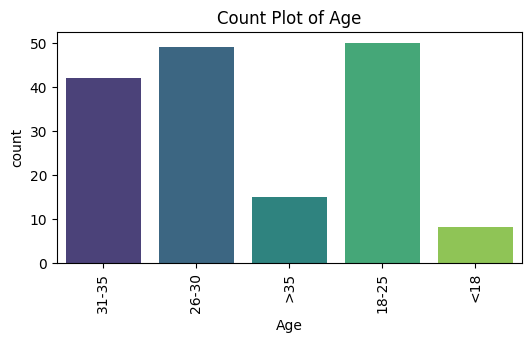

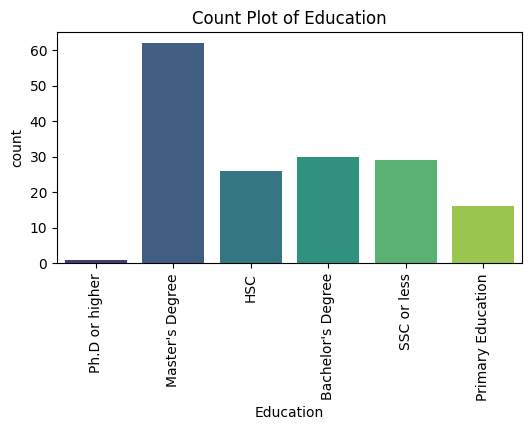

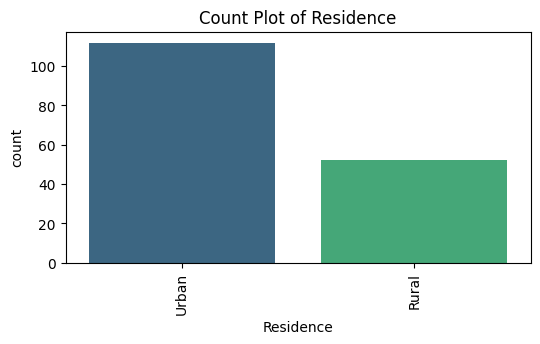

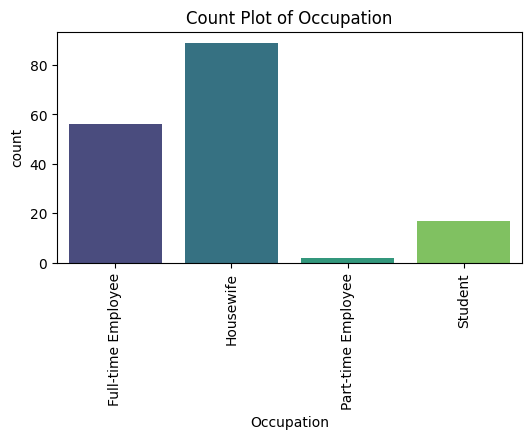

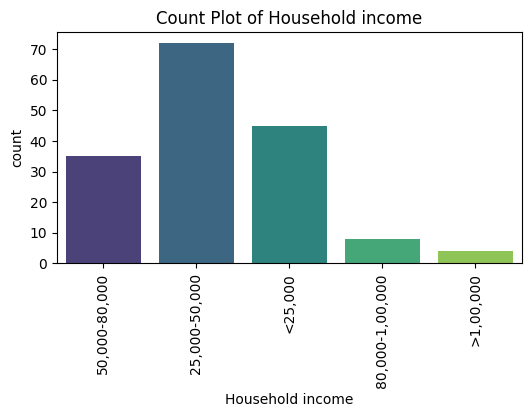

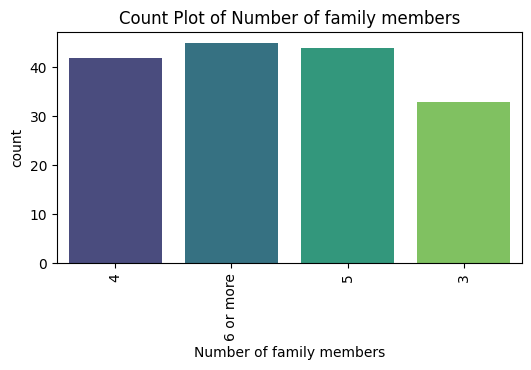

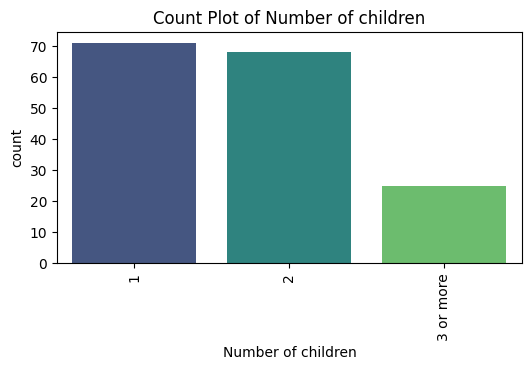

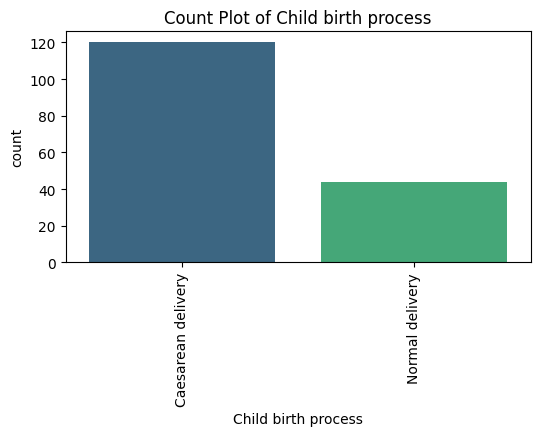

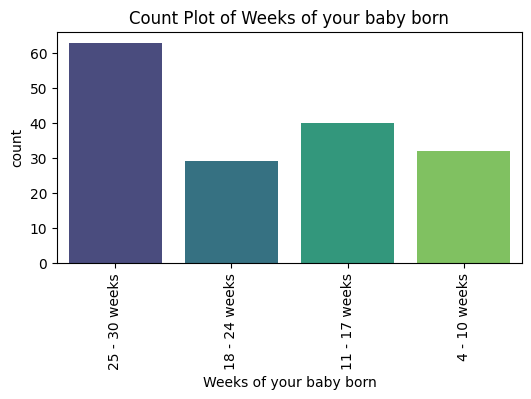

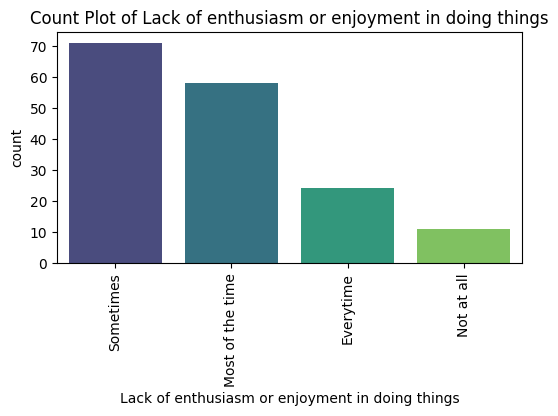

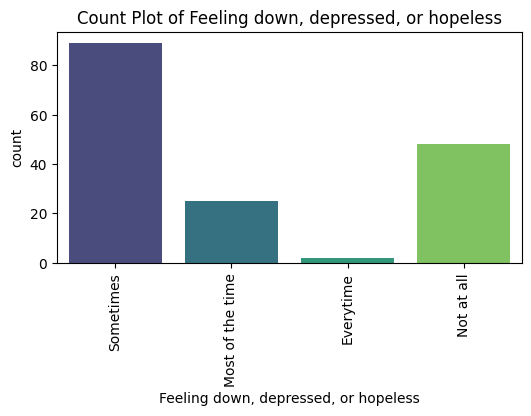

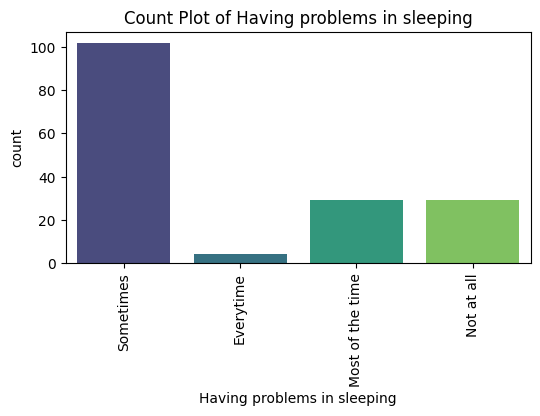

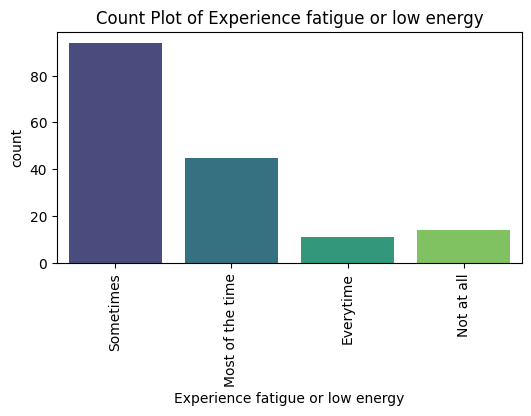

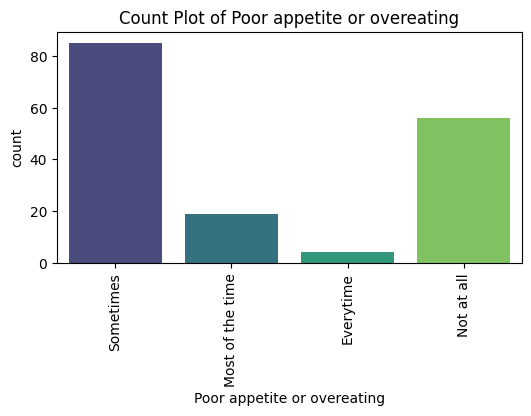

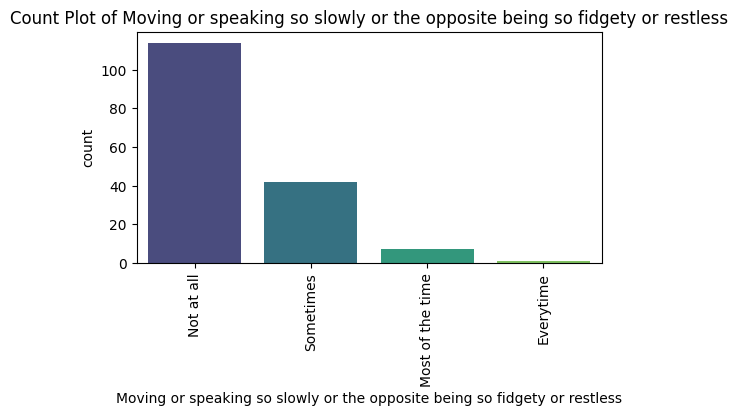

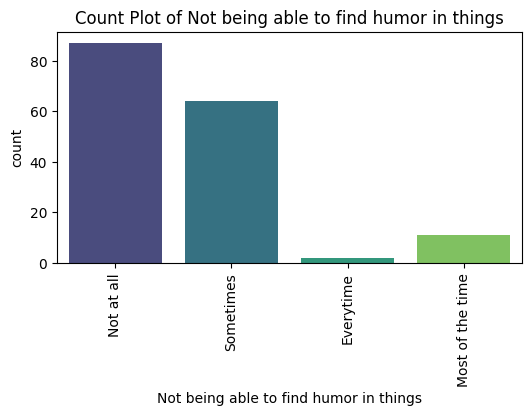

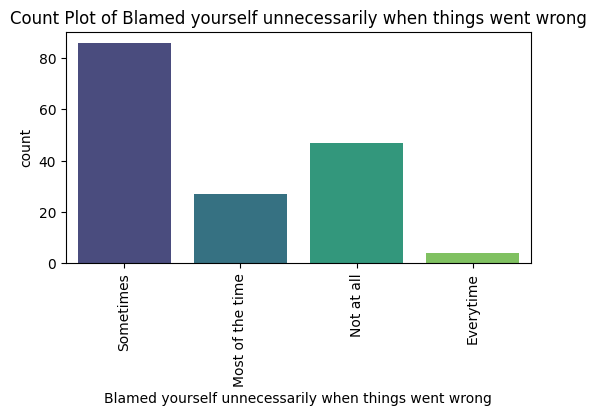

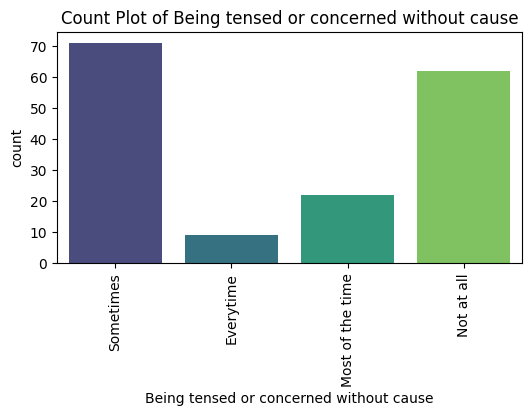

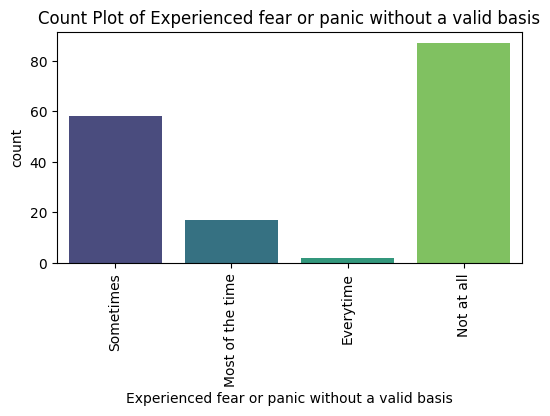

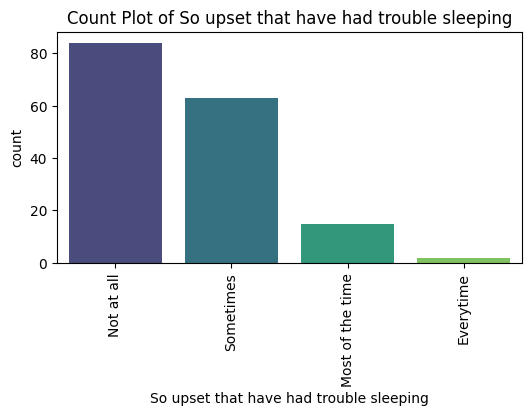

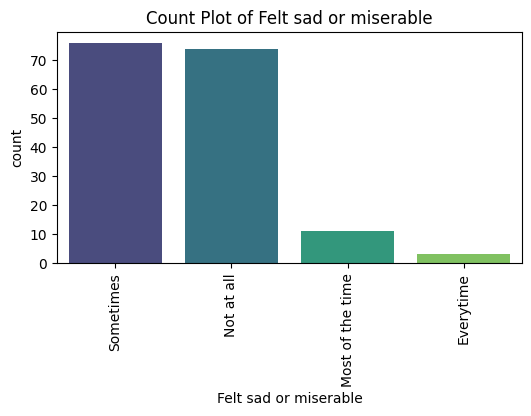

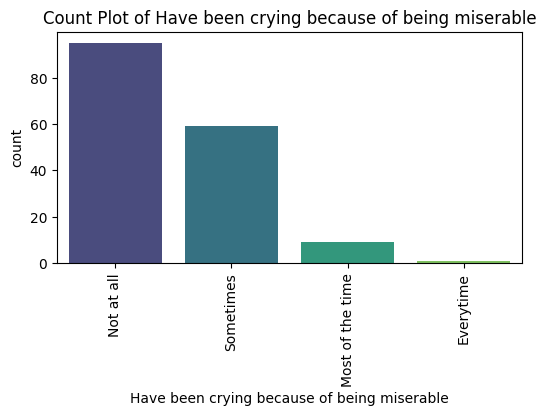

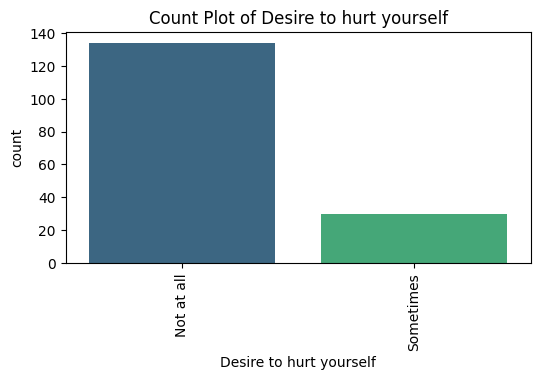

In [12]:
# Plotting the counts of observations in each categorical bin
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure(figsize=(6, 3))
        sns.countplot(x=col, data=df, hue=col, palette='viridis', legend=False)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=90)
        plt.show()

In [13]:
# Map the values
depression_columns = [
    "Lack of enthusiasm or enjoyment in doing things",
    "Feeling down, depressed, or hopeless",
    "Having problems in sleeping",
    "Experience fatigue or low energy",
    "Poor appetite or overeating",
    "Moving or speaking so slowly or the opposite being so fidgety or restless",
    "Not being able to find humor in things",
    "Blamed yourself unnecessarily when things went wrong",
    "Being tensed or concerned without cause",
    "Experienced fear or panic without a valid basis",
    "So upset that have had trouble sleeping",
    "Felt sad or miserable",
    "Have been crying because of being miserable",
    "Desire to hurt yourself"
]

response_mapping = {
    "Not at all": 0,
    "Sometimes": 1,
    "Most of the time": 2,
    "Everytime": 3
}

df[depression_columns] = df[depression_columns].replace(response_mapping).infer_objects(copy=False)

# Printing depression columns
print(df[depression_columns].head())

   Lack of enthusiasm or enjoyment in doing things  \
0                                                1   
1                                                1   
2                                                2   
3                                                2   
4                                                1   

   Feeling down, depressed, or hopeless  Having problems in sleeping  \
0                                     1                            1   
1                                     2                            3   
2                                     2                            1   
3                                     2                            1   
4                                     2                            3   

   Experience fatigue or low energy  Poor appetite or overeating  \
0                                 1                            1   
1                                 2                            1   
2                                 3   

<ipython-input-13-80c488642a71>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[depression_columns] = df[depression_columns].replace(response_mapping).infer_objects(copy=False)


In [14]:
# Sum those measurements and classify
df['Depression_Score'] = df[depression_columns].sum(axis=1)
df['Depressive'] = df['Depression_Score'].apply(lambda x: "Depressive" if x >= 14 else "Not Depressive")

# Print the updated dataset with depression score and classification
print("\nUpdated Data with Depression Score and Classification:")
print(df[['Depression_Score', 'Depressive']].head())


Updated Data with Depression Score and Classification:
   Depression_Score      Depressive
0                 9  Not Depressive
1                16      Depressive
2                21      Depressive
3                24      Depressive
4                23      Depressive


Number of respondents:
Not Depressive: 110
Depressive: 54

Percentage of respondents:
Not Depressive: 67.07%
Depressive: 32.93%


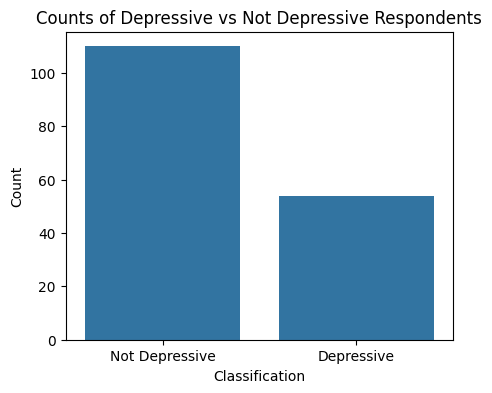

In [15]:
# Count the number of 'Depressive' and 'Not Depressive' respondents
depression_counts = df['Depressive'].value_counts()

# Calculate the percentage of each class
depression_percentage = df['Depressive'].value_counts(normalize=True) * 100

# Print the results
print("Number of respondents:")
print(f"Not Depressive: {depression_counts.get('Not Depressive', 0)}")
print(f"Depressive: {depression_counts.get('Depressive', 0)}")

print("\nPercentage of respondents:")
print(f"Not Depressive: {depression_percentage.get('Not Depressive', 0):.2f}%")
print(f"Depressive: {depression_percentage.get('Depressive', 0):.2f}%")

# Create a bar plot for the counts
plt.figure(figsize=(5, 4))
sns.barplot(x=depression_counts.index, y=depression_counts.values)
plt.title('Counts of Depressive vs Not Depressive Respondents')
plt.ylabel('Count')
plt.xlabel('Classification')
plt.xticks(rotation=0)
plt.show()


Model: Random Forest
Confusion Matrix:
 [[31  1]
 [ 3 15]]


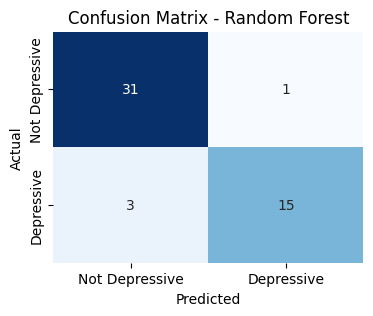


Accuracy: 0.92
Precision: 0.9375
Recall (Sensitivity): 0.8333333333333334
F1 Score: 0.8823529411764706
Specificity: 0.96875

Model: SVM
Confusion Matrix:
 [[30  2]
 [ 1 17]]


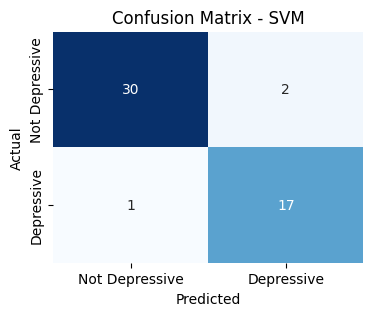


Accuracy: 0.94
Precision: 0.8947368421052632
Recall (Sensitivity): 0.9444444444444444
F1 Score: 0.918918918918919
Specificity: 0.9375

Model: Logistic Regression
Confusion Matrix:
 [[31  1]
 [ 0 18]]


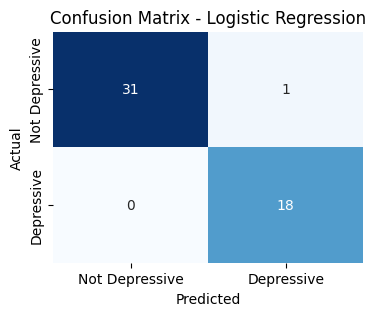


Accuracy: 0.98
Precision: 0.9473684210526315
Recall (Sensitivity): 1.0
F1 Score: 0.972972972972973
Specificity: 0.96875

Model: Naive Bayes
Confusion Matrix:
 [[31  1]
 [ 0 18]]


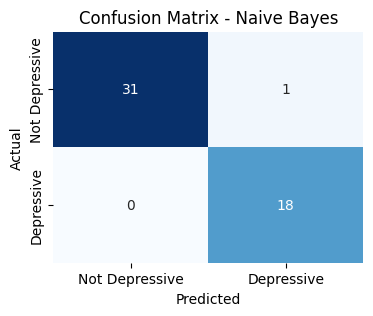


Accuracy: 0.98
Precision: 0.9473684210526315
Recall (Sensitivity): 1.0
F1 Score: 0.972972972972973
Specificity: 0.96875

Model: Gradient Boosting
Confusion Matrix:
 [[29  3]
 [ 4 14]]


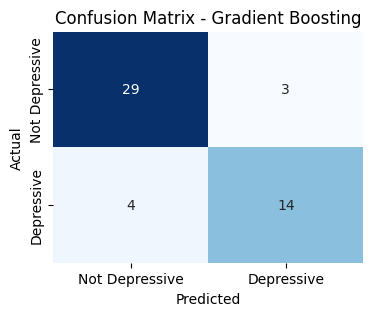


Accuracy: 0.86
Precision: 0.8235294117647058
Recall (Sensitivity): 0.7777777777777778
F1 Score: 0.8
Specificity: 0.90625


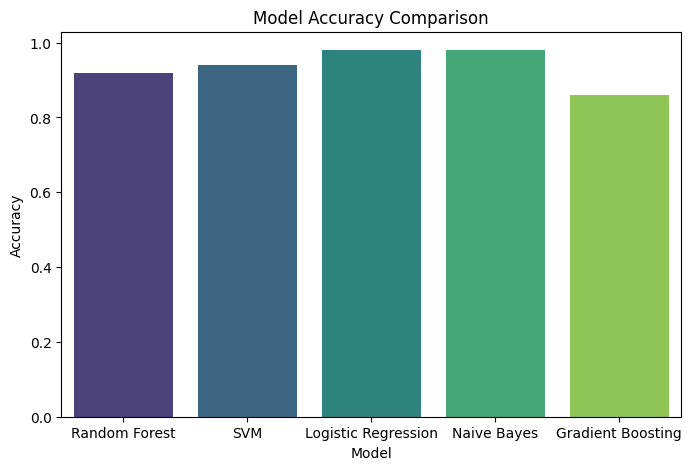

In [16]:
# Apply machine learning models

# Select features (depression columns) and target variable (Depressive)
X = df[depression_columns]
y = df['Depressive'].map({"Not Depressive": 0, "Depressive": 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}
# Dictionary to store model accuracy
accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Not Depressive', 'Depressive'],
                yticklabels=['Not Depressive', 'Depressive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall (Sensitivity):", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Specificity:", recall_score(y_test, y_pred, pos_label=0))
    # Plot all model accuracies after the loop
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis", hue=list(accuracies.keys()), dodge=False)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

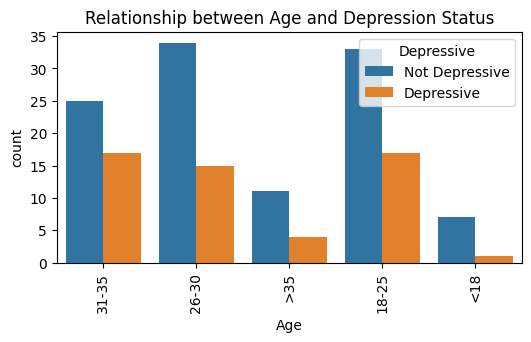


Contingency table for Age:
Depressive  Depressive  Not Depressive
Age                                   
18-25               17              33
26-30               15              34
31-35               17              25
<18                  1               7
>35                  4              11


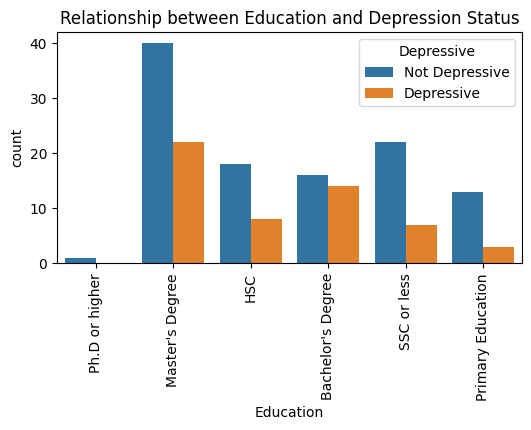


Contingency table for Education:
Depressive         Depressive  Not Depressive
Education                                    
Bachelor's Degree          14              16
HSC                         8              18
Master's Degree            22              40
Ph.D or higher              0               1
Primary Education           3              13
SSC or less                 7              22


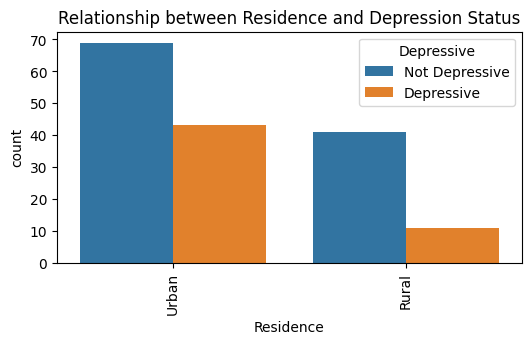


Contingency table for Residence:
Depressive  Depressive  Not Depressive
Residence                             
Rural               11              41
Urban               43              69


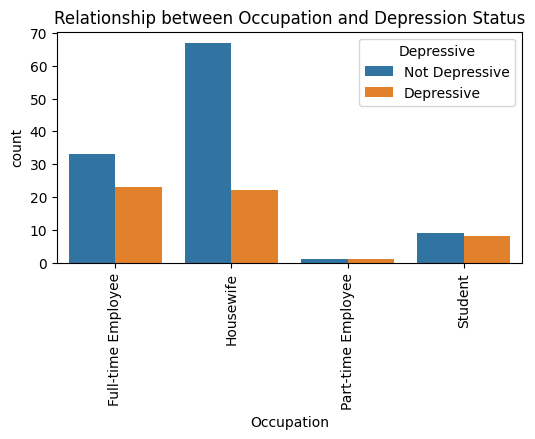


Contingency table for Occupation:
Depressive          Depressive  Not Depressive
Occupation                                    
Full-time Employee          23              33
Housewife                   22              67
Part-time Employee           1               1
Student                      8               9


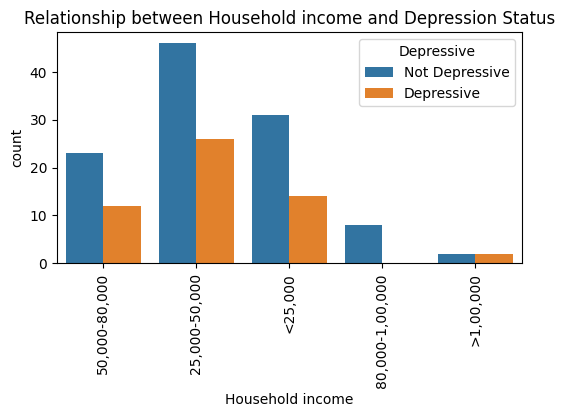


Contingency table for Household income:
Depressive        Depressive  Not Depressive
Household income                            
25,000-50,000             26              46
50,000-80,000             12              23
80,000-1,00,000            0               8
<25,000                   14              31
>1,00,000                  2               2


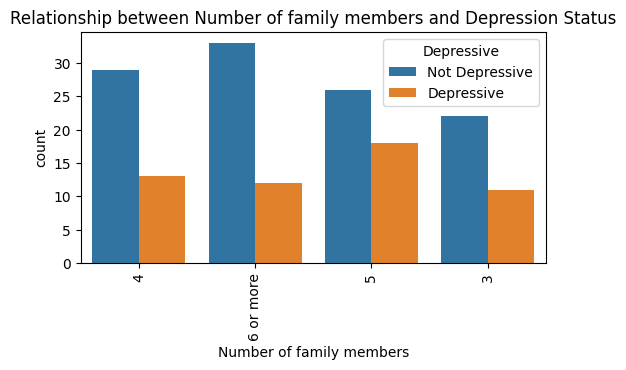


Contingency table for Number of family members:
Depressive                Depressive  Not Depressive
Number of family members                            
3                                 11              22
4                                 13              29
5                                 18              26
6 or more                         12              33


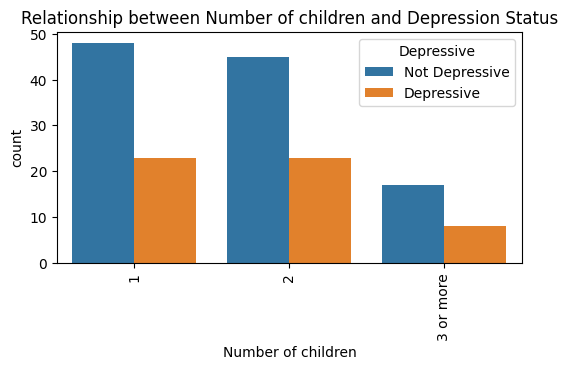


Contingency table for Number of children:
Depressive          Depressive  Not Depressive
Number of children                            
1                           23              48
2                           23              45
3 or more                    8              17


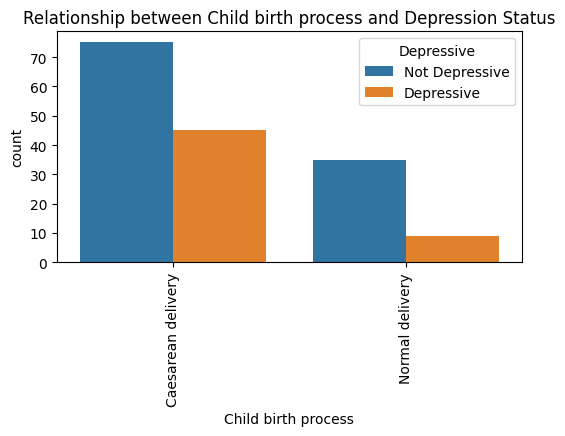


Contingency table for Child birth process:
Depressive           Depressive  Not Depressive
Child birth process                            
Caesarean delivery           45              75
Normal delivery               9              35


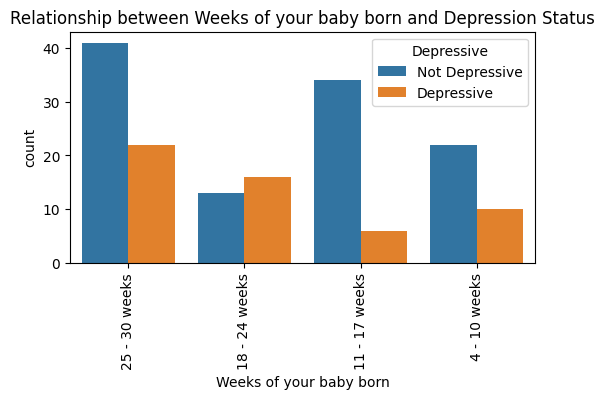


Contingency table for Weeks of your baby born:
Depressive               Depressive  Not Depressive
Weeks of your baby born                            
11 - 17 weeks                     6              34
18 - 24 weeks                    16              13
25 - 30 weeks                    22              41
4 - 10 weeks                     10              22


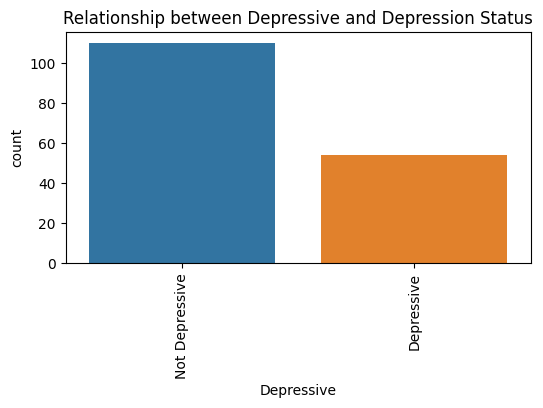


Contingency table for Depressive:
Depressive      Depressive  Not Depressive
Depressive                                
Depressive              54               0
Not Depressive           0             110


In [17]:
# List of non-numeric (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Analyze the relationship of each non-numeric column with 'Depressive'
for col in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Depressive', data=df)
    plt.title(f'Relationship between {col} and Depression Status')
    plt.xticks(rotation=90)
    plt.show()

    # Display contingency table
    contingency_table = pd.crosstab(df[col], df['Depressive'])
    print(f"\nContingency table for {col}:")
    print(contingency_table)

In [18]:
# Initialize a dictionary to store p-values
p_values = {}

# Categorical Columns: Use Chi-square test
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Depressive':  # Exclude target column
        contingency_table = pd.crosstab(df[col], df['Depressive'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        p_values[col] = p

# Numerical Columns: Use Pearson Correlation Test
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    correlation, p = pearsonr(df[col], df['Depressive'].map({"Not Depressive": 0, "Depressive": 1}))
    p_values[col] = p

# Display the p-values
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'p-value']).sort_values(by='p-value')
print(p_values_df)

# Highlight features with significant relationships (p < 0.05)
significant_features = p_values_df[p_values_df['p-value'] < 0.05]
print("\nSignificant Features (p < 0.05):")
print(significant_features)

                                              Feature       p-value
23                                   Depression_Score  3.164072e-41
21        Have been crying because of being miserable  5.353304e-23
10               Feeling down, depressed, or hopeless  3.333878e-13
20                              Felt sad or miserable  5.222409e-13
19            So upset that have had trouble sleeping  6.290315e-13
17            Being tensed or concerned without cause  2.860723e-12
12                   Experience fatigue or low energy  1.797505e-11
16  Blamed yourself unnecessarily when things went...  1.393283e-10
18    Experienced fear or panic without a valid basis  4.497708e-10
11                        Having problems in sleeping  6.907221e-09
15             Not being able to find humor in things  2.518126e-08
14  Moving or speaking so slowly or the opposite b...  3.809495e-07
22                            Desire to hurt yourself  8.536911e-07
13                        Poor appetite or overe

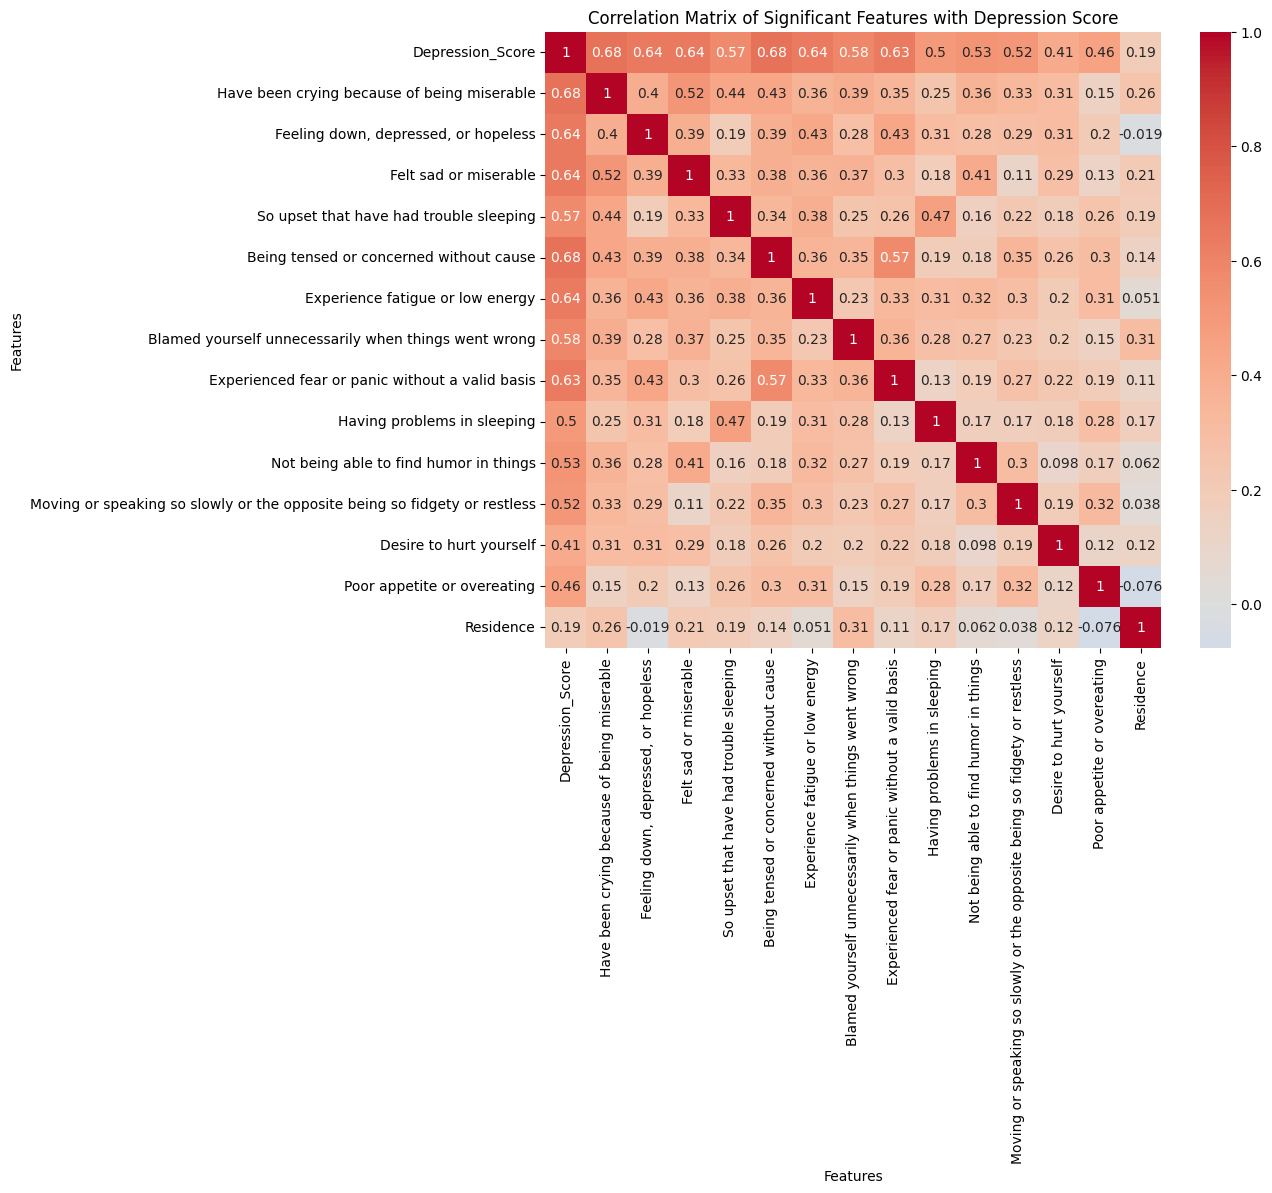

In [19]:
# Map 'Residence' column: 'Rural' to 0 and 'Urban' to 1
df['Residence'] = df['Residence'].map({'Rural': 0, 'Urban': 1})

# Assuming p_values_df is the DataFrame that contains features and their p-values
# Filter to get only significant features (p-value < 0.05)
significant_features = p_values_df[p_values_df['p-value'] < 0.05]['Feature'].tolist()

# Create a new DataFrame with only the significant features and the target variable
correlation_data = df[significant_features]

# Select only numeric columns
numeric_correlation_data = correlation_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)

# Set labels
plt.title('Correlation Matrix of Significant Features with Depression Score')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

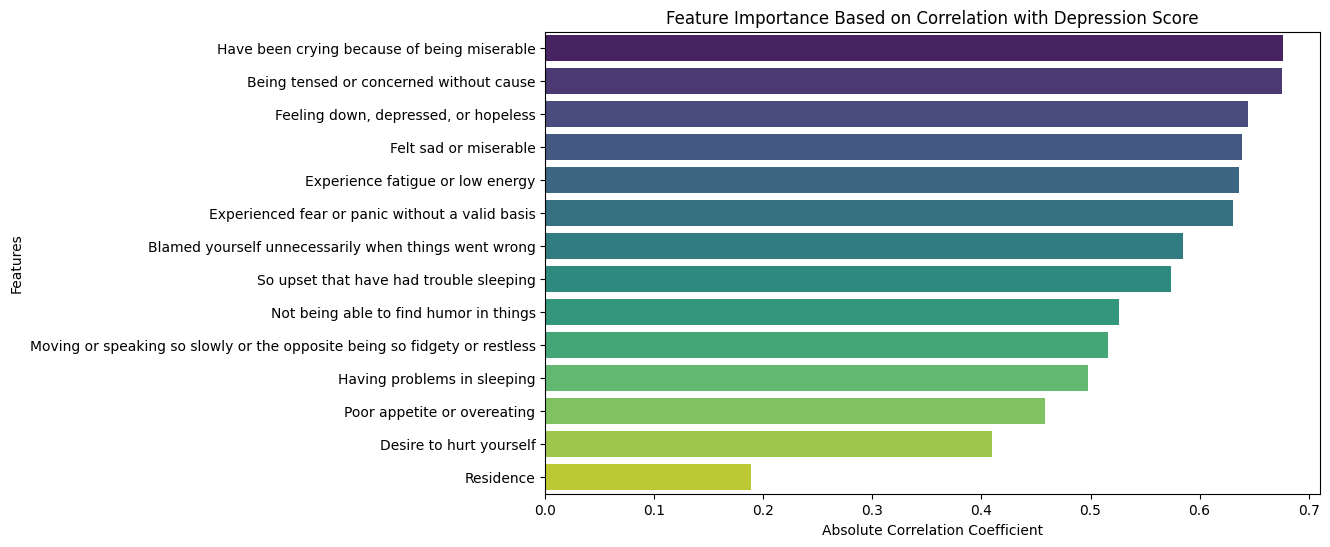

In [20]:
# Extract correlations with the target variable
correlation_with_target = correlation_matrix['Depression_Score'].drop('Depression_Score')

# Ensure it's a Series
if isinstance(correlation_with_target, pd.DataFrame):
    correlation_with_target = correlation_with_target.iloc[:, 0]

# Sort features by absolute correlation values
sorted_correlations = correlation_with_target.abs().sort_values(ascending=False)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis', hue=sorted_correlations.index, legend=False)
plt.title('Feature Importance Based on Correlation with Depression Score')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.show()